## 소개: Home Credit Default Risk Competition - 대출금 상환 여부 예측

이 대회의 목적은 과거 대출 신청 데이터를 사용하여 신청자가 대출금을 상환할 수 있는지 여부를 예측하는 것이다. 이것은 표준 감독 분류 작업이다.

- Supervised: 레이블은 교육 데이터에 포함되며 목표는 특성에서 레이블을 예측하는 방법을 학습하는 모델을 훈련하는 것입니다.
- Classification: 레이블은 이진 변수입니다. 0 - (제시 대출 상환), 1 - (대출 상환에 어려움이 있음)

## 데이터.
이 데이터는 비은행 인구에게 제공되는 신용 한도(대출 한도) 전용 서비스인 홈 크레딧에 의해 제공됩니다. 고객이 대출금을 상환할 것인지 또는 어려움을 겪을 것인지를 예측하는 것이 매우 중요한 비즈니스 요구 사항이며, 홈 크레딧은 Kaggle에서 이 과제를 수행하기 위해 머신러닝 커뮤니티가 어떤 모델을 개발할 수 있는지 알아보기 위해 이 대회를 주최하고 있습니다.

데이터 소스에는 7가지가 있습니다.

- application_train/application_test: 홈 크레딧의 각 대출 애플리케이션에 대한 정보가 포함된 기본 교육 및 테스트 데이터. 모든 대출은 자체 행이 있으며 SK_ 기능으로 식별됩니다.ID_CURR. 교육 신청 데이터는 TARGET과 함께 제공됩니다: 대출금 상환 또는 1: 대출금 상환 미상환.
- bure: 다른 금융 기관으로부터의 고객의 이전 신용에 관한 데이터. 각 이전 크레딧은 국에서 자체 행이 있지만, 애플리케이션 데이터의 한 대출은 이전 크레딧을 여러 개 가질 수 있습니다.
- bure_balance: bureau의 이전 크레딧에 대한 월별 데이터입니다. 각 행은 이전 신용도의 한 달이며, 이전 신용도의 한 행은 신용 기간의 한 달에 하나씩 여러 개의 행을 가질 수 있습니다.
- previous_application : 신청 데이터에 대출이 있는 고객의 홈크레디트 이전 대출 신청. 애플리케이션 데이터의 각 유동 대출은 이전 대출이 여러 개 있을 수 있습니다. 각 이전 응용 프로그램에는 행이 하나씩 있으며 SK_ID_PREV기능으로 식별됩니다.
- POS_CASH_BALANCE: 고객이 홈 크레딧을 통해 이전 판매 시점 또는 현금 대출에 대한 월별 데이터입니다. 각 행은 이전 판매 시점 또는 현금 대출의 한 달이며, 하나의 이전 대출은 여러 행을 가질 수 있습니다.
- credit_card_balance: 고객이 홈 크레딧과 함께 사용한 이전 신용카드에 대한 월별 데이터입니다. 각 행은 신용카드 잔액의 한 달이고, 하나의 신용카드는 많은 행을 가질 수 있다.
- installments_payments: 홈 크레딧에서 이전 대출에 대한 지불 내역. 결제를 할 때마다 하나의 행이 있고 결제를 놓칠 때마다 하나의 행이 있습니다.

이 다이어그램은 모든 데이터의 관계를 보여 줍니다.
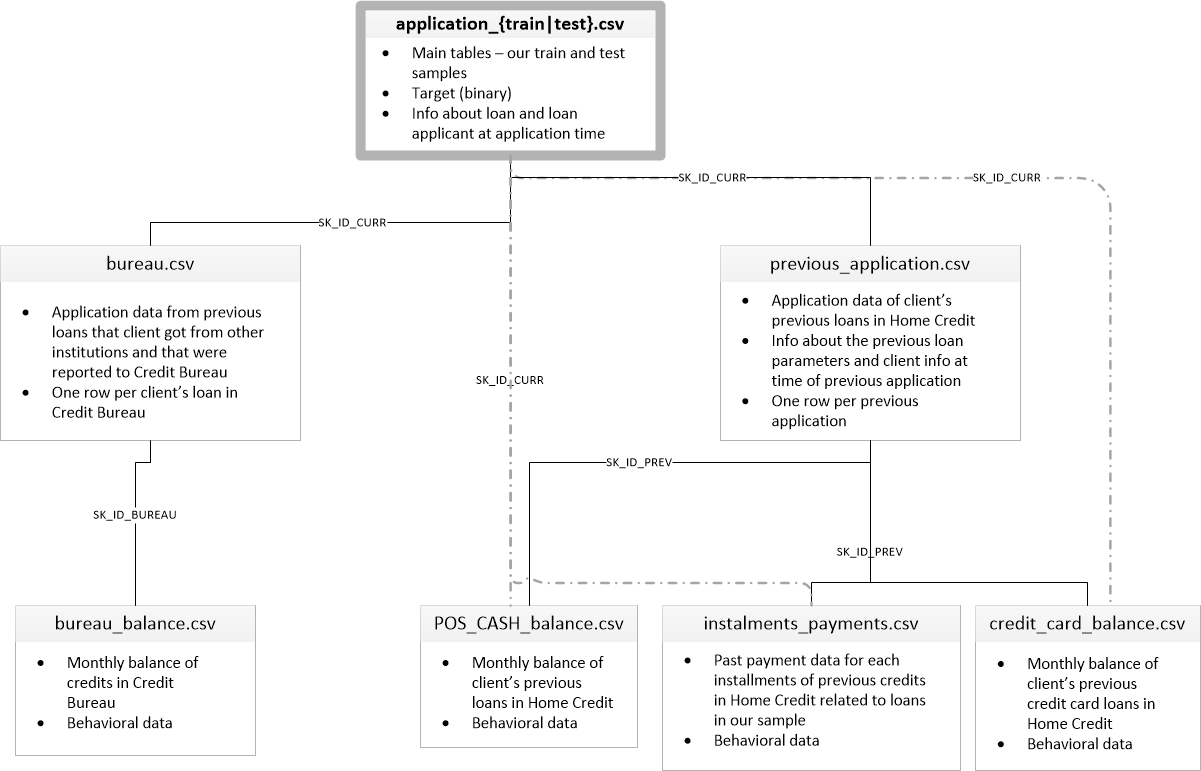


- 0 이면 대출상환 가능, 1이면 대출상환 어려움
- 주어진 여러 데이터 테이블이 있지만, 이 노트북에서는 메인 테이블
- application_train, application_test만 사용할 예정

또한 모든 열의 정의(HomeCredit_columns_descv)와 예상 제출 파일의 예가 제공됩니다.


## 측정법: ROC AUC
일단 우리가 데이터를 파악하게 되면(칼럼 설명을 통해 읽는 것이 매우 도움이 됨), 우리는 제출물을 판단하는 지표를 이해할 필요가 있다. 이 경우 곡선 아래의 수신기 작동 특성 영역(ROC AUC, AUROC라고도 함)으로 알려진 공통 분류 지표이다.

ROC AUC는 위협적으로 들릴 수 있지만, 일단 두 가지 개별 개념을 이해할 수 있다면 비교적 간단하다. 수신자 작동 특성(ROC) 곡선은 참 양수 대 거짓 양수 비율을 그래프로 표시합니다.

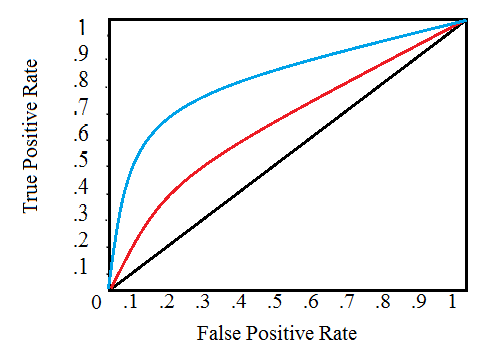

AUC-ROC 곡선은 다양한 임계값에서 모델의 분류 성능에 대한 측정 그래프

- ROC = 모든 임계값에서 분류 모델의 성능을 보여주는 그래프
- AUC(Area Under the Curve) = ROC곡선아래영역
    - 우수한 분류모델은 AUC값이 1에 가깝고, 클래스를 분류하는 성능이 뛰어남을 의미
    - AUC 최소값은 0.5으로, 이 경우 모델의 클래스 분리 능력이 전혀 없음을 뜻함

#### AUC해석 * AUC=0.7이면, 해당 분류 모델이 양성 클래스와 음성 클래스를 구별할 수 있는 확률은 70%

#### ROC-curve에서의 수식Permalink
- True positive rates(=recall, sensitivity)
    - TPR = R = TP / (TP+FN)
        - 실제 암 환자 중에서 암환자라고 맞춘 확률
- True negative rates(=specificity)
    - TNR = TN / (TN+FP)
        - 실제 정상인 환자 중에서 정상이라고 맞춘 확률
- ROC-curve에서 x축, y축
    - y축 : TPR(=Recall)
    - x축 : 1-(TNR)

## 라이브러리 가져오기
numpy, panda, sklearn, matplotlib 사용

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder

import os

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 훈련 데이터
app_train=pd.read_csv('application_train.csv')
print('Training data shape : ',app_train.shape)
app_train.head()

Training data shape :  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


교육 데이터에는 307511개의 관측치(각 관측치는 별도의 대여)와 목표값(예측하려는 레이블)을 포함하여 122개의 형상(변수)이 있습니다.

In [3]:
# 검증 데이터
app_test=pd.read_csv('application_test.csv')
print('Testing data shape : ',app_test.shape)
app_test.head()

Testing data shape :  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


검정 집합이 상당히 작으며 목표값 열이 없습니다.

## 탐색 데이터 분석
탐색적 데이터 분석(EDA)은 데이터 내의 추세, 이상 징후, 패턴 또는 관계를 찾기 위해 통계를 계산하고 수치를 작성하는 개방형 프로세스입니다. EDA의 목표는 데이터가 우리에게 무엇을 알려줄 수 있는지 배우는 것입니다. 일반적으로 개괄적인 개요로 시작한 다음 데이터의 흥미로운 영역을 발견하면 특정 영역으로 좁혀집니다. 연구 결과는 그 자체로 흥미로운 것일 수도 있고, 사용할 기능을 결정하는 데 도움이 되는 등 모델링 선택 사항을 알리는 데 사용될 수도 있습니다.

## 목표값 열의 분포 조사
대출금 0이 제때 상환됐거나 고객이 지급에 어려움을 겪었음을 나타내는 1이 목표입니다. 우리는 우선 각 범주에 속하는 대출의 수를 살펴볼 수 있습니다.

In [4]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

<AxesSubplot:ylabel='Frequency'>

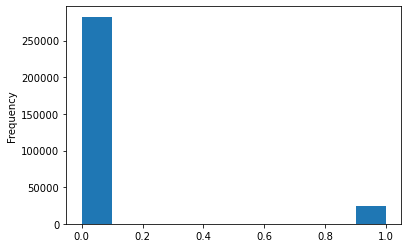

In [5]:
app_train['TARGET'].astype(int).plot.hist()

이 정보를 통해 우리는 이것이 불균형적인 계급 문제임을 알 수 있습니다. 제때 상환한 대출이 미상환 대출보다 훨씬 많다. 우리가 좀 더 정교한 머신러닝 모델에 들어가면, 우리는 이러한 불균형을 반영하기 위해 데이터에서의 표현으로 수업의 가중치를 매길 수 있다.

## 결측값 검사
다음으로 각 열에 있는 결측값의 수와 백분율을 살펴볼 수 있습니다.

In [6]:
# 열을 기준으로 결측값 계산하는 함수
def missing_values_table(df):
    # 총 결측치
    mis_val=df.isnull().sum()
    
    # 결측치 비율
    mis_val_percent=100*df.isnull().sum() / len(df)
    
    # 결과들을 테이블로 만들기
    mis_val_table=pd.concat([mis_val,mis_val_percent],axis=1)
    
    # 칼럼 이름 변경
    mis_val_table_ren_columns=mis_val_table.rename(
    columns={0:'Missing Values',1:'% of Total Values'})
    
    # 결측치 내림차순 비율별로 테이블 정렬
    mis_val_table_ren_columns=mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1]!=0].sort_values('% of Total Values',ascending=False).round(1)
    
    # 간단한 요약정보 출력
    print('Your selected dataframe has ' + str(df.shape[1])+' columns.\n'
         'There are ' + str(mis_val_table_ren_columns.shape[0]) + ' columns that have missing values')
    
    # 결측치 정보가 담긴 데이터프레임 가져오기
    return mis_val_table_ren_columns

In [7]:
# 결측치 통계
missing_values=missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


머신러닝 모델을 구축해야 할 때가 되면 이러한 결측값(귀속값)을 채워야 합니다. 이후 작업에서는 귀책 없이 결측값을 처리할 수 있는 XGBoost와 같은 모델을 사용할 것입니다. 결측값 비율이 높은 열을 삭제하는 것도 다른 방법이지만, 결측값이 모형에 도움이 될지는 미리 알 수 없다. 따라서 우리는 당분간 모든 컬럼을 유지할 것입니다.

## 열 유형
각 데이터 유형의 열 수를 살펴보겠습니다. int64 및 float64는 숫자 변수(불연속 또는 연속형)입니다. 객체 열에는 문자열이 포함되어 있으며 범주형 피쳐입니다.

In [8]:
# 각 칼럼의 유형 개수
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

이제 각 객체(범주형) 열에 있는 고유한 항목 수를 살펴보겠습니다.

In [9]:
# 각 칼럼의 고유 클래스 수 확인
app_train.select_dtypes('object').apply(pd.Series.nunique,axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

대부분의 범주형 변수에는 상대적으로 적은 수의 고유 항목이 있습니다. 우리는 이러한 범주형 변수를 다룰 방법을 찾아야 할 것이다!

## 범주형 변수 인코딩
더 나아가기 전에 성가신 범주형 변수를 처리해야 합니다. 기계 학습 모델은 안타깝게도 범주형 변수를 처리할 수 없다(LightGBM과 같은 일부 모델 제외). 그러므로, 우리는 이 변수들을 모델에게 넘기기 전에 숫자로 인코딩하는 방법을 찾아야 한다. 이 프로세스를 수행하는 방법에는 크게 두 가지가 있습니다.

- 레이블 인코딩: 범주형 변수의 각 고유 범주를 정수로 할당합니다. 새 열이 생성되지 않습니다. 예는 다음과 같습니다.
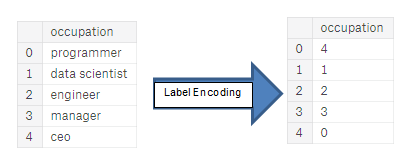

- 원 핫 인코딩: 범주형 변수의 각 고유 범주에 대해 새 열을 만듭니다. 각 관측치는 해당 범주에 대해 열에 1을 받고 다른 모든 새 열에 0을 받습니다.
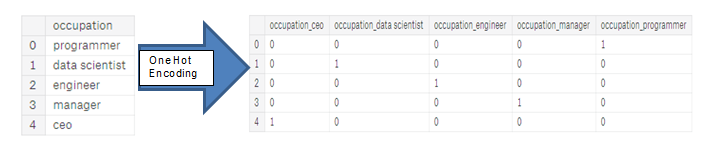

1) Label encoding :

    - 범주형 변수의 개별값을 숫자로 바꿔주는 방법. 컬럼을 새로 생성하지 않음
    - 여성/남성 처럼 범주형 변수의 값이 두개일경우는 Label encoding을 사용해도 무관하지만, 그 이상일 경우는 One-hot encoding을 사용하는것이 좋음
2) One-hot encoding :

    - 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시하는 방법
    - One-hot encoding의 경우 범주형 변수의 유니크한값의 개수만큼 컬럼이 늘어난다는것
        - 이를 보완하기 위해 PCA같은 차원축소 방법을 사용할수도있음
        
이 노트북에서는 범주형변수의 유니크한 값이 2개일경우 Label encoding을 사용하고 그 이상일 경우 One-hot encoding을 사용할것다.

## 레이블 인코딩 및 원핫 인코딩
위에서 설명한 정책을 구현하겠습니다. 2개의 고유 범주가 있는 모든 범주형 변수(dtype == 객체)에는 레이블 인코딩을 사용하고, 2개 이상의 고유 범주가 있는 모든 범주형 변수의 경우에는 원핫 인코딩을 사용합니다.

레이블 인코딩의 경우 Scikit-Learn LabelEncoder를 사용하고 원핫 인코딩의 경우 판다 get_dummies(df) 기능을 사용한다.

In [10]:
# 레이블 인코딩
le=LabelEncoder()
le_count=0

# 열들 반복
for col in app_train:
    if app_train[col].dtype=='object':
        # 범주가 2개 이하인 경우
        if len(list(app_train[col].unique()))<=2:
            # 훈련 데이터에 적용
            le.fit(app_train[col])
            # 훈련 데이터, 검증 데이터에 모두 변환
            app_train[col]=le.transform(app_train[col])
            app_test[col]=le.transform(app_test[col])
            
            # 레이블 인코딩된 열 수 추적
            le_count+=1
            
print('%d columns were label encoded' % le_count)

3 columns were label encoded


In [11]:
# 범주형 변수의 원 핫 인코딩
app_train=pd.get_dummies(app_train)
app_test=pd.get_dummies(app_test)

print('Training Features shape : ',app_train.shape)
print('Testing Features shape : ',app_test.shape)

Training Features shape :  (307511, 243)
Testing Features shape :  (48744, 239)


## 교육 및 테스트 데이터 조정
교육 및 테스트 데이터 모두에 동일한 특징(열)이 있어야 합니다. 테스트 데이터에 표시되지 않는 범주를 가진 범주형 변수가 있기 때문에 원핫 인코딩은 교육 데이터에 더 많은 열을 만들었습니다. 테스트 데이터에 없는 교육 데이터의 열을 제거하려면 데이터 프레임을 정렬해야 합니다. 먼저 교육 데이터에서 대상 열을 추출한다(테스트 데이터에 없지만 이 정보를 유지해야 하기 때문이다). 정렬을 수행할 때 행이 아닌 열을 기준으로 데이터 프레임을 정렬하도록 축 = 1을 설정해야 합니다!

In [12]:
# align : 두 객체를 동시에 정렬
train_labels=app_train['TARGET']

# 교육 및 테스트 데이터를 정렬하고 두 데이터 프레임에 열만 표시
app_train,app_test=app_train.align(app_test,join='inner',axis=1)

# 대상 다시 추가
app_train['TARGET']=train_labels

print('Training Features shape : ',app_train.shape)
print('Testing Features shape : ',app_test.shape)

Training Features shape :  (307511, 240)
Testing Features shape :  (48744, 239)


교육 및 테스트 데이터 세트에는 이제 기계 학습에 필요한 동일한 기능이 있습니다. 원핫 인코딩으로 인해 기능 수가 크게 증가했습니다. 데이터 세트의 크기를 줄이기 위해 언젠가는 차원 축소(관련성이 없는 기능 제거)를 시도해야 할 것입니다.

## 탐색 데이터 분석으로 돌아가기
### 이상 징후
EDA를 수행할 때 항상 주의해야 할 한 가지 문제는 데이터 내의 이상 현상입니다. 이는 숫자를 잘못 입력한 경우, 측정 장비의 오류 또는 유효하지만 극단적인 측정 때문일 수 있습니다. 이상 징후를 정량적으로 지원하는 한 가지 방법은 설명 방법을 사용하여 열의 통계를 살펴보는 것입니다. DAYS_BORTH 열의 숫자는 현재 대출 신청과 비교하여 기록되기 때문에 음수입니다. 이 통계량을 년 단위로 보려면 -1을 곱하고 일 수로 나누면 됩니다.

In [13]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

그 나이들은 합리적으로 보입니다. 상한값과 하한값 모두 연령에 대한 특이치가 없습니다. 근무일은 어떻게 되나요?

In [14]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

그건 옳지 않은 것 같습니다! 최대값(양수 값 외에도)은 약 1000년입니다!

Text(0.5, 0, 'Days Employment')

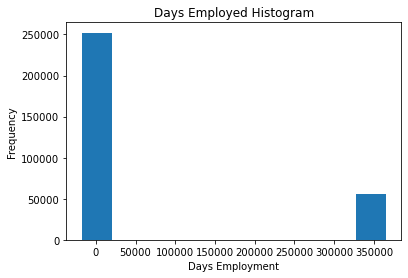

In [15]:
app_train['DAYS_EMPLOYED'].plot.hist(title='Days Employed Histogram')
plt.xlabel('Days Employment')

궁금해서, 변칙적인(anomalies) 클라이언트의 부분 집합을 취해서 나머지 클라이언트보다 디폴트 비율이 높은지 낮은지 알아보겠습니다.

In [16]:
anom=app_train[app_train['DAYS_EMPLOYED']==365243]
non_anom=app_train[app_train['DAYS_EMPLOYED']!=365243]
print('The non-anomalies default on %0.2f%% of loans' % (100*non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment'%len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


그거 정말 흥미롭네요! 이상징후가 채무불이행 비율이 낮은 것으로 나타났다.

이상 징후를 처리하는 것은 설정된 규칙이 없는 정확한 상황에 따라 달라집니다. 가장 안전한 접근 방법 중 하나는 이상 징후를 결측값으로 설정한 다음 기계 학습 전에 (귀속 기능을 사용하여) 기입하는 것입니다. 이 경우 모든 변칙이 정확히 동일한 가치를 가지기 때문에 이 모든 대출이 공통점을 공유하는 경우를 대비해 동일한 가치로 채우고자 합니다. 변칙적인 값들은 어느 정도 중요성이 있는 것 같기 때문에 실제로 우리가 이 값들을 채웠는지 머신러닝 모델에 알려주고자 한다. 이에 대한 해결책으로 숫자(np.nan)가 아닌 변칙 값을 채운 다음 값이 변칙적이었는지 여부를 나타내는 새로운 부울 열을 만들 것이다.

Text(0.5, 0, 'Days Employment')

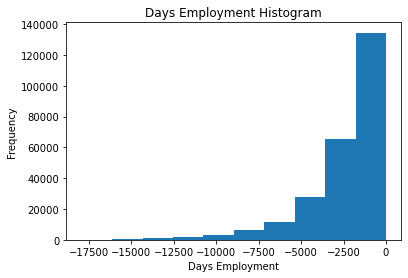

In [17]:
# 변칙 플래그 열 만들기
app_train['DAYS_EMPLOYED_ANOM']=app_train['DAYS_EMPLOYED']==365243

# 변칙 값을 nan으로 바꿉니다.
app_train['DAYS_EMPLOYED'].replace({365243:np.nan},inplace=True)

app_train['DAYS_EMPLOYED'].plot.hist(title='Days Employment Histogram')
plt.xlabel('Days Employment')

분포는 우리가 예상하는 값과 훨씬 더 일치하는 것으로 보이며, 이러한 값이 원래 비정상적이라는 것을 모형에 알리기 위해 새 열을 만들었습니다(따라서 열의 중위수인 일부 값을 입력해야 함). 데이터 프레임에 DAYS가 있는 다른 열은 뚜렷한 특이치 없이 예상할 수 있는 열입니다.

매우 중요한 사항으로, 교육 데이터에 대해 수행하는 모든 작업은 테스트 데이터에도 적용되어야 합니다. 새 열을 만들고 기존 열을 검정 데이터에 np.nan으로 채우도록 합시다.

In [18]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


### 상관관계
이제 범주형 변수와 특이치를 다루었으므로 EDA를 계속 진행하겠습니다. 데이터를 이해하려는 한 가지 방법은 기능과 대상 간의 상관 관계를 찾는 것입니다. .corr 데이터 프레임 방법을 사용하여 모든 변수와 대상 사이의 피어슨 상관 계수를 계산할 수 있습니다.

상관 계수는 형상의 "관련성"을 나타내는 가장 좋은 방법은 아니지만 데이터 내에서 가능한 관계에 대한 개념을 제공한다. 상관 계수 절대값에 대한 일반적인 해석은 다음과 같다.

- .00-.19 "매우 약함"
- .20-.39 "약함"
- .40-.59 "추적"
- .60-.79 "강력"
- .80-1.0 "매우 강력"

In [19]:
# 대상과의 상관관계 찾기
correlations=app_train.corr()['TARGET'].sort_values()

# 상관관계 보여주기
print('Most Positive Correlations : \n',correlations.tail(15))
print('\nMost Negative Correlations:\n',correlations.head(15))

Most Positive Correlations : 
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Nega

좀 더 중요한 상관관계를 살펴봅시다: DAYS_BORTH가 가장 양의 상관관계입니다. (변수와 변수의 상관 관계가 항상 1이므로 목표값 제외!) 문서를 보면 DAYS_BORTH는 대출 당시 고객의 나이(일)를 마이너스 날짜(사유 불문)로 나타냅니다. 상관 관계는 양수이지만 이 기능의 값은 실제로 음수이므로 클라이언트가 나이가 들수록 대출 채무 불이행(대상 == 0) 가능성이 줄어듭니다. 그것은 조금 헷갈리므로 기능의 절대값을 구한 다음 상관관계를 음수화하겠습니다.

## 연령이 상환에 미치는 영향

In [20]:
# 출생 후 양의 일수와 대상 간의 상관관계를 찾습니다.
app_train['DAYS_BIRTH']=abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930831003195

고객이 나이가 들수록 대상과 마이너스 선형 관계가 형성되는데, 이는 고객이 나이가 들수록 대출금을 제때 상환하는 경우가 많아진다는 뜻이다.

이 변수를 살펴봅시다. 첫째, 우리는 시대의 히스토그램을 만들 수 있습니다. 줄거리를 조금 더 이해하기 쉽게 하기 위해 몇 년 안에 x축을 넣을 것입니다.

Text(0, 0.5, 'Count')

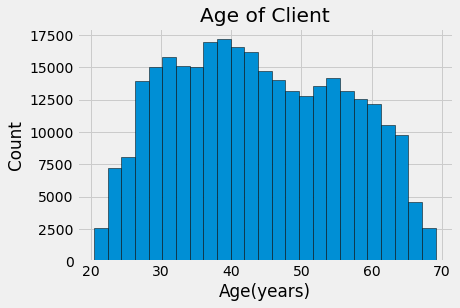

In [21]:
# 플롯 스타일 설정
plt.style.use('fivethirtyeight')

# 연령 분포 그림(년)
plt.hist(app_train['DAYS_BIRTH']/365,edgecolor='k',bins=25)
plt.title('Age of Client')
plt.xlabel('Age(years)')
plt.ylabel('Count')

나이 분포 자체로는 모든 연령이 합리적이기 때문에 특이치가 없다는 것 외에는 많은 것을 알 수 없다. 연령이 대상에 미치는 영향을 시각화하기 위해, 우리는 다음으로 대상의 값에 의해 색칠된 커널 밀도 추정 그림(KDE)을 만들 것이다. 커널 밀도 추정 그림은 단일 변수의 분포를 나타내며 평활 히스토그램으로 생각할 수 있다(각 데이터 지점에서 커널(일반적으로 가우스)을 계산한 다음 모든 개별 커널을 평균화하여 하나의 평활 곡선을 만든다). 우리는 이 그래프에 Seaborn kdeplot를 사용할 것입니다.

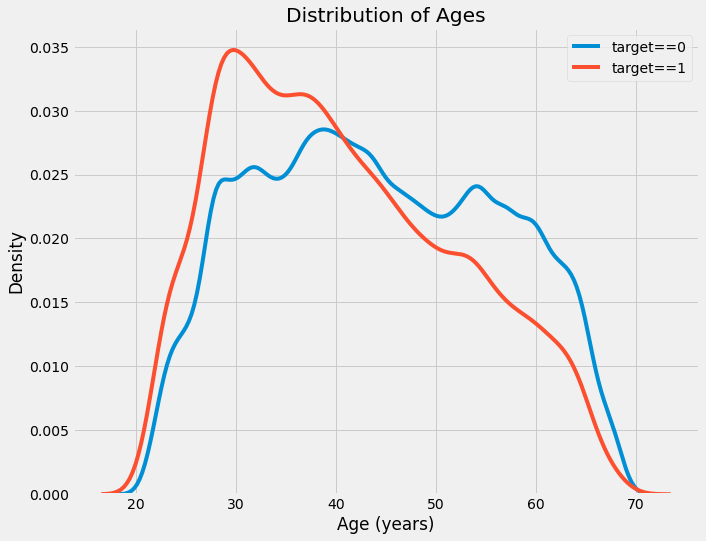

In [22]:
plt.figure(figsize=(10,8))

# 기한 내에 상환된 대출의 KDE 그림
sns.kdeplot(app_train.loc[app_train['TARGET']==0,'DAYS_BIRTH']/365,label='target==0')

# 기한 내에 상환되지 않은 대출의 KDE 그림
sns.kdeplot(app_train.loc[app_train['TARGET']==1,'DAYS_BIRTH']/365,label='target==1')

# 레이블링
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Distribution of Ages')
plt.legend()

연령에 따른 kde plot을 살펴보니 target == 1의 곡선은 어린 쪽 끝을 향해 기울어진다. 상관 계수가 0.07로 유의하다고 볼 수는 없지만 변수에 영향을 끼치므로 유용하게 사용할 수 있을 것 같습니다. 
 
또 다른 방법으로 평균 연령대별로 대출 상환 실패를 살펴 보겠습니다. 
연령 범주를 5년씩 자르고, 각각의 평균값을 계산하여 각 연령 범주에서 상환되지 않은 대출의 비율을 알려줍니다. 

In [23]:
# 연령 정보를 별도의 데이터 프레임으로 변환
age_data=app_train[['TARGET','DAYS_BIRTH']]
age_data['YEARS_BIRTH']=age_data['DAYS_BIRTH']/365

# 연령 데이터 범위
age_data['YEARS_BINNED']=pd.cut(age_data['YEARS_BIRTH'],bins=np.linspace(20,70,num=11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [24]:
# 범위(years_binned)을 기준으로 그룹화하고 평균을 계산합니다.
age_groups=age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


Text(0.5, 1.0, 'Failure to Repay by Age Group')

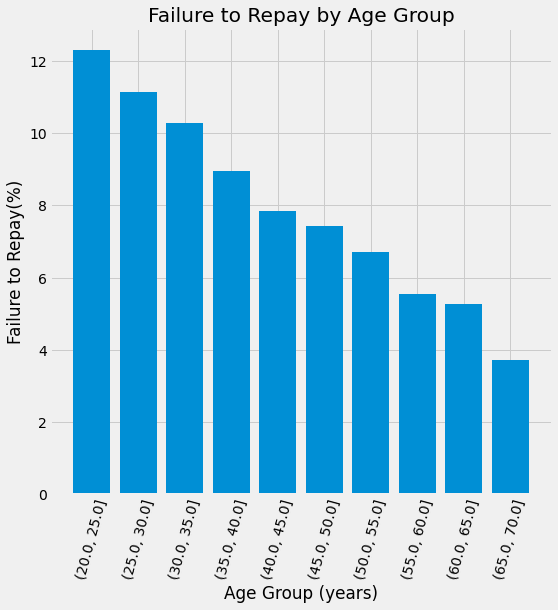

In [25]:
plt.figure(figsize=(8,8))

# 나이 빈 및 목표값의 평균을 막대 그림으로 그래프 작성
plt.bar(age_groups.index.astype(str),100*age_groups['TARGET'])

# 레이블링
plt.xticks(rotation=75)
plt.xlabel('Age Group (years)')
plt.ylabel('Failure to Repay(%)')
plt.title('Failure to Repay by Age Group')

분명한 추세가 있다: 젊은 지원자들은 대출금을 갚지 않을 가능성이 더 높다! 상환하지 못하는 비율은 가장 어린 세 연령대가 10%를 넘고, 가장 나이가 많은 세 연령대가 5%를 넘습니다.

이것은 은행이 직접 사용할 수 있는 정보입니다: 젊은 고객들은 대출금을 상환할 가능성이 적기 때문에, 그들에게 더 많은 안내나 재정 계획 팁을 제공해야 할 것입니다. 은행이 젊은 고객을 차별해야 한다는 뜻은 아니지만 젊은 고객이 제때 결제할 수 있도록 예방적 조치를 취하는 것이 현명할 것이다.

### 외부 소스
목표값과 가장 강한 음의 상관 관계를 갖는 3개의 변수는 EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3입니다. 설명서에 따르면 이러한 기능은 "외부 데이터 소스의 정규화된 점수"를 나타냅니다. 이게 정확히 무슨 뜻인지는 모르겠지만, 수많은 데이터 소스를 이용해 만든 일종의 누적 신용등급일 수도 있다.

이 변수들을 살펴봅시다.

먼저 EXT_SOURCE 기능의 대상 및 상호 상관 관계를 보여 줄 수 있습니다.

In [26]:
ext_data=app_train[['TARGET','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH']]
ext_data_corrs=ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

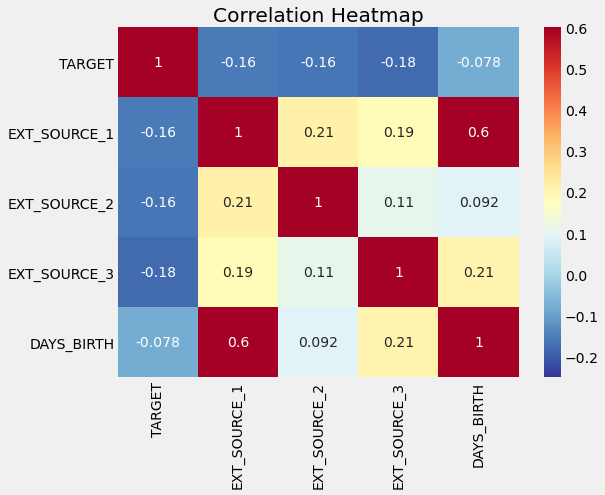

In [27]:
plt.figure(figsize=(8,6))

# 상관관계 히트맴
sns.heatmap(ext_data_corrs,cmap=plt.cm.RdYlBu_r,vmin=-0.25,annot=True,vmax=0.6)
plt.title('Correlation Heatmap')

1. 세가지 EXT_SOURCE 모두 target과 음의 상관관계를 가지고 있어, EXT_SOURCE가 증가할수록 대출금을 상환할 가능성이 높다는 것을 알 수 있습니다.

2. 또한  DAYS_BIRTH가 EXT_SOURCE_1과 양의 상관관계로 점수의 요인 중 하나로 연령이 관련있다고 볼 수 있습니다.


각 변수가 대상에 미치는 영향을 시각화한 부분.

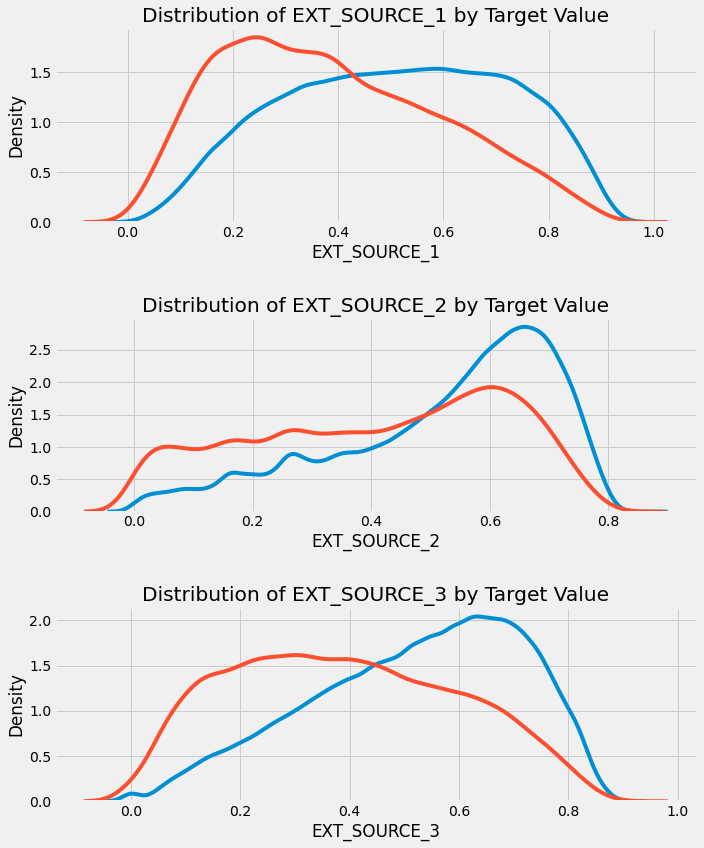

In [28]:
plt.figure(figsize=(10,12))

# 출처 반복
for i, source in enumerate(['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']):
    # 각 SOURCE마다 새로운 SUBPLOT만들기
    plt.subplot(3,1,i+1)
    # 상환 그래프
    sns.kdeplot(app_train.loc[app_train['TARGET']==0,source],label='target==0')
    # 미상환 그래프
    sns.kdeplot(app_train.loc[app_train['TARGET']==1,source],label='target==1')
    
    # 레이블링
    plt.title('Distribution of %s by Target Value'%source)
    plt.xlabel('%s'%source)
    plt.ylabel('Density')
    
plt.tight_layout(h_pad=2.5)

EXT_SOURCE_3는 목표값 간의 가장 큰 차이를 표시합니다. 우리는 이 특징이 신청자가 대출금을 상환할 가능성과 어느 정도 관련이 있다는 것을 분명히 알 수 있습니다. 관계는 그리 강하지 않지만(사실 모두 매우 약한 것으로 간주되지만, 이러한 변수는 여전히 기계 학습 모델에서 신청자가 대출금을 제때 상환할 것인지 여부를 예측하는 데 유용하다.

## Pair plot
최종 탐색 그림으로 EXT_SOURCE 변수와 DAYS_BORT 변수의 쌍 그림을 만들 수 있습니다. 쌍 그림은 단일 변수의 분포뿐만 아니라 여러 변수 쌍 간의 관계를 확인할 수 있기 때문에 훌륭한 탐색 도구입니다. 여기서는 Seaborn 시각화 라이브러리와 PairGrid 함수를 사용하여 위쪽 삼각형에 산점도, 대각선에 히스토그램, 아래쪽 삼각형에 2D 커널 밀도도와 상관 계수가 있는 쌍 그림을 만들고 있다.


Text(0.5, 1.05, 'Ext Source and Age Features Pairs Plot')

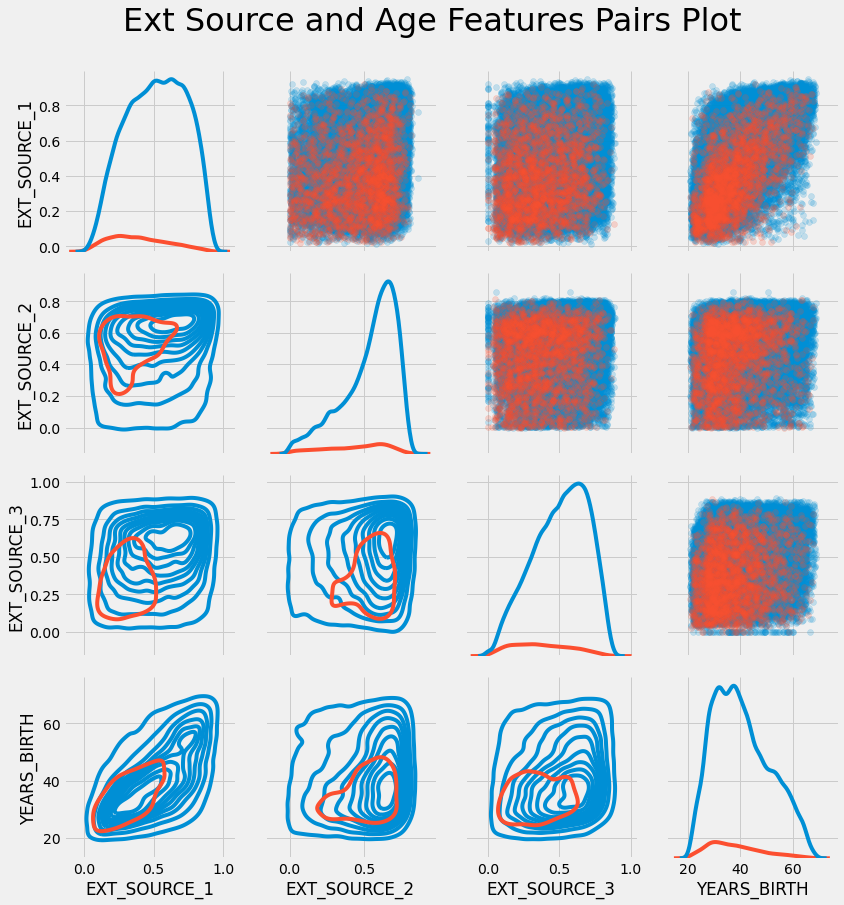

In [29]:
# 그래프에 그리기 위해 데이터 복사
plot_data=ext_data.drop(columns=['DAYS_BIRTH']).copy()

# 고객 연령 추가
plot_data['YEARS_BIRTH']=age_data['YEARS_BIRTH']

# na 값을 삭제하고 처음 100000 행으로 제한
plot_data=plot_data.dropna().loc[:100000.:]

# 두 열 사이의 상관 계수를 계산하는 함수
def corr_func(x,y,**kwargs):
    r=np.corrcoef(x,y)[0][1] # 피어슨 상관계수 구하기
    ax=plt.gca()
    ax.annotate('r={:.2f}'.format(r),xy=(.2, .8),xycoords=ax.transAxes,
               size=20) # 주석달기
    
# pairgrid 객체를 작성합니다.
grid=sns.PairGrid(data=plot_data,size=3,diag_sharey=False,hue='TARGET',
                 vars=[x for x in list(plot_data.columns) if x!='TARGET'])

# 상단은 scatterplot
grid.map_upper(plt.scatter,alpha=0.2)

# 대각선은 히스토그램
grid.map_diag(sns.kdeplot)

# 하단은 density plot
grid.map_lower(sns.kdeplot,cmap=plt.cm.OrRd_r)

plt.suptitle('Ext Source and Age Features Pairs Plot',size=32,y=1.05)

이 그림에서 빨간색은 갚지 않은 대출금이고 파란색은 갚지 않은 대출금입니다. 우리는 데이터 내의 다양한 관계를 볼 수 있습니다. EXT_SOURCE_1과 DAYS_BORTH(또는 동등하게 YEARS_BORTH) 사이에는 중간 정도의 양의 선형 관계가 있는 것으로 나타나며, 이는 이 특징이 클라이언트의 수명을 고려할 수 있음을 나타냅니다.

## 피쳐 엔지니어링
 이것은 기계 학습의 패턴 중 하나를 나타낸다. 피처 엔지니어링은 모델 구축 및 하이퍼 파라미터 튜닝보다 투자 수익률이 더 높다. 이것은 그 주제에 관한 훌륭한 기사이다.)
올바른 모델과 최적의 설정을 선택하는 것도 중요하지만 모델은 주어진 데이터로부터만 배울 수 있습니다. 이러한 데이터가 작업과 최대한 관련되도록 하는 것이 데이터 과학자의 일입니다(그리고 일부 자동화된 도구도 도움이 될 수 있습니다).

피쳐 엔지니어링은 유전자 과정을 가리키며 형상 구성(기존 데이터에서 새로운 형상 추가)과 형상 선택(가장 중요한 형상 또는 차원 축소의 다른 방법 선택)을 모두 포함할 수 있다. 피쳐를 만들고 피쳐를 선택하는 데 사용할 수 있는 많은 기술이 있습니다.

다른 데이터 소스를 사용할 때 많은 피쳐 엔지니어링을 수행하겠지만 이 노트북에서는 다음과 같은 두 가지 간단한 피쳐 구성 방법만 사용해 보겠습니다.

- 다항식 특징(polynomial features)
- 도메인 지식 기능

## 다항식 특징
하나의 간단한 피쳐 생성 방법은 다항식 피쳐라고 불린다. 이 방법에서는 기존 특징 간의 상호 작용 항뿐만 아니라 기존 특징의 힘인 특징을 만든다. 예를 들어, 변수 EXT_SOURCE_1^2와 EXT_SOURCE_2^2를 만들 수 있으며 EXT_SOURCE_1 x EXT_SOURCE_2^2, EXT_SOURCE_2^2 등과 같은 변수도 생성할 수 있습니다. 여러 개별 변수의 조합인 이러한 피쳐는 변수 간의 교호작용을 포착하기 때문에 교호작용 항이라고 합니다. 즉, 두 변수 자체는 대상에 큰 영향을 미치지 않을 수 있지만, 두 변수를 함께 결합하면 대상과의 관계가 나타날 수 있습니다. 상호작용 용어는 통계 모델에서 다중 변수의 영향을 포착하기 위해 일반적으로 사용되지만 기계 학습에서만큼 자주 사용되지 않습니다. 그럼에도 불구하고, 우리는 고객이 대출금을 상환할 것인지 아닌지를 예측하는 데 도움이 될 수 있는지 몇 가지 시도해 볼 수 있습니다.

Jake VanderPlas는 그의 훌륭한 책 Python for Data Science에서 더 많은 정보를 원하는 사람들을 위해 다항식 기능에 대해 썼다.

다음 코드에서는 EXT_SOURCE 변수와 DAYS_BORTH 변수를 사용하여 다항식 피쳐를 만듭니다. Scikit-Learn에는 다항식 및 교호작용 항을 지정된 정도까지 생성하는 DanulicialFeatures라는 유용한 클래스가 있습니다. 3도를 사용하여 결과를 확인할 수 있습니다(다항식 형상을 만들 때 형상의 수가 정도에 따라 기하급수적으로 확장되고 과적합 문제에 부딪힐 수 있기 때문에 너무 높은 정도를 사용하지 않으려고 합니다).

In [30]:
# polynomial features에 대한 새 데이터 프레임 만들기
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# 결측값을 처리하기 위한 중간값
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')

poly_target=poly_features['TARGET']
poly_features=poly_features.drop(columns=['TARGET'])

# 결측값 귀속 필요
poly_features=imputer.fit_transform(poly_features)
poly_features_test=imputer.fit_transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures

# 지정된 차수로 다항식 개체 만들기
poly_transformer=PolynomialFeatures(degree=3)

In [31]:
# Polynomial Features 훈련
poly_transformer.fit(poly_features)

# 특징 변환
poly_features=poly_transformer.transform(poly_features)
poly_features_test=poly_transformer.transform(poly_features_test)
print('Polynomial Features shape : ',poly_features.shape)

Polynomial Features shape :  (307511, 35)


이로 인해 상당한 수의 새로운 기능이 생성됩니다. 이름을 얻기 위해서는 다항식 피쳐 get_feature_names 방법을 사용해야 한다.

In [32]:
poly_transformer.get_feature_names(input_features=['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH'])[:15]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2']

개별 특징을 최대 3등급까지 곱하기 위해 높이고 교호작용 항을 포함하는 35개의 특징이 있습니다. 이제 이러한 새로운 기능 중 하나라도 대상과 관련이 있는지 확인할 수 있습니다.

In [33]:
# 피쳐의 데이터 프레임을 작성합니다.
poly_features=pd.DataFrame(poly_features,
                          columns=poly_transformer.get_feature_names(['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH']))

# target에 추가
poly_features['TARGET']=poly_target
# 대상과의 상관 관계 찾기
poly_corrs=poly_features.corr()['TARGET'].sort_values()
# 가장 상관관계가 없거나, 있는 것들 표시
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


새로운 변수 중 일부는 원래 특징보다 목표와의 상관관계가 더 큽니다(절대 크기 측면에서). 우리가 머신러닝 모델을 만들 때, 우리는 그것들이 실제로 모델의 학습에 도움이 되는지 결정하기 위해 이러한 기능을 사용하거나 사용하지 않고 시도할 수 있다.

이러한 기능을 교육 및 테스트 데이터의 복사본에 추가한 다음 기능이 있는 모델과 없는 모델을 평가할 것입니다. 기계 학습에서 많은 경우, 한 가지 방법이 효과가 있을지 알 수 있는 유일한 방법은 그것을 시도해 보는 것입니다!

In [35]:
# 테스트 기능을 데이터 프레임에 포함
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))
# polynomial features를 교육 데이터 프레임에 병합
poly_features['SK_ID_CURR']=app_train['SK_ID_CURR']
app_train_poly=app_train.merge(poly_features, on='SK_ID_CURR',how='left')

# polynomial features를 검증 데이터 프레임에 병합
poly_features_test['SK_ID_CURR']=app_test['SK_ID_CURR']
app_test_poly=app_test.merge(poly_features_test,on='SK_ID_CURR',how='left')

# 데이터 프레임 정렬
app_train_poly, app_test_poly=app_train_poly.align(app_test_poly,join='inner',axis=1)

# shape 가져오기
print('Training data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial features shape:  ', app_test_poly.shape)

Training data with polynomial features shape:  (307511, 275)
Testing data with polynomial features shape:   (48744, 275)


### 도메인 지식 기능
사용하는 5가지 기능

- CREDIT_INCOME_PERCENT: 고객의 소득에 대한 신용 금액의 백분율
- ANNUITY_INCOME_PERCENT: 고객의 소득에 대한 대출 연금의 백분율
- CREDIT_TERM: 지급 기간(연금은 매달 지급해야 하는 금액이기 때문에)
- DAYS_EMPLOYED_PERCENT: 클라이언트의 연령에 대한 고용일수 비율

다시 한 번, 아귀아르와 그의 이러한 특징들을 탐구해준 훌륭한 대본 덕분입니다.

In [36]:
app_train_domain=app_train.copy()
app_test_domain=app_test.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

In [37]:
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']

#### 새 변수 시각화
이러한 도메인 지식 변수를 그래프로 시각적으로 탐색해야 합니다. 이 모든 것에 대해서, 같은 KDE 플롯을 TARGET 값으로 색칠합니다.

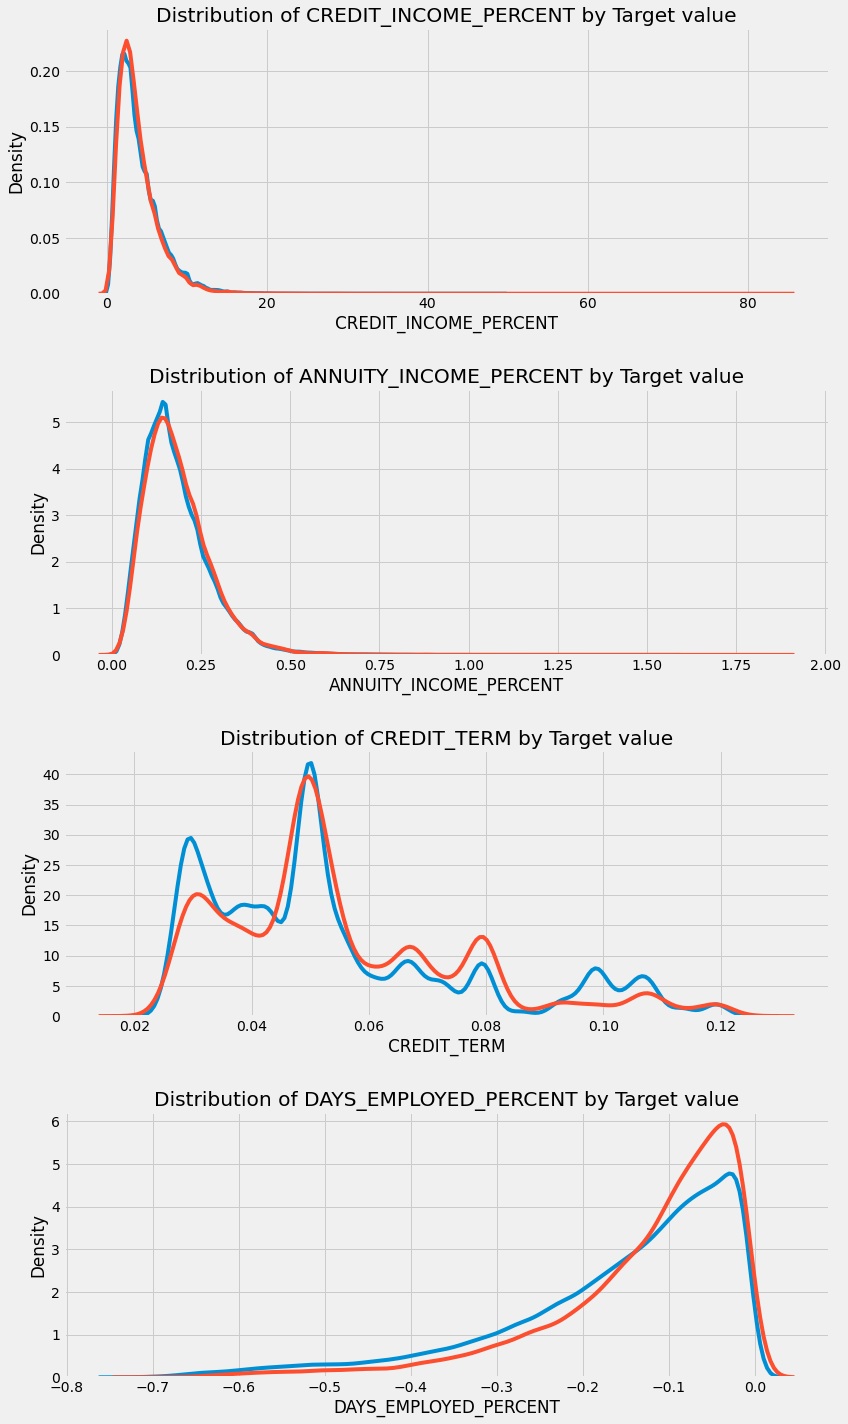

In [38]:
plt.figure(figsize=(12,20))
# 새로운 특징들 나열
for i, feature in enumerate(['CREDIT_INCOME_PERCENT','ANNUITY_INCOME_PERCENT','CREDIT_TERM','DAYS_EMPLOYED_PERCENT']):
    # 새로운 서브플롯 만들기
    plt.subplot(4,1,i+1)
    # 대출금 지불의 경우
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET']==0,feature],label='target==0')
    # 대출금 미지불의 경우
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET']==1,feature],label='target==1')
    
    # 레이블링
    plt.title('Distribution of %s by Target value'% feature)
    plt.xlabel('%s'%feature)
    plt.ylabel('Density')
    
plt.tight_layout(h_pad=2.5) # 자동으로 명시된 여백에 관련된 서브플롯 파라미터 조정 h_pad:높이여백, wpad:너비여백

## 베이스라인
단순한 기준선의 경우 테스트 세트의 모든 예에 대해 동일한 값을 추측할 수 있습니다. 대출금을 갚지 않을 확률을 예측해야 하므로 아예 모르겠다면 검정 세트의 모든 관측치에 대해 0.5를 추측할 수 있습니다. 이렇게 하면 경기에서 0.5의 곡선 아래 리시버 작동 특성 영역(AUC ROC)을 얻을 수 있습니다(분류 작업에 대한 무작위 추측은 0.5점).

우리는 이미 몇 점 받을지 알고 있기 때문에, 확실한 분석인 로지스틱 회귀 분석을 사용합니다.

## 로지스틱 회귀 분석 구현

기준선을 얻으려면 범주형 변수를 인코딩한 후 모든 기능을 사용합니다. 결측치(인포지션)를 기입해, 피쳐의 범위를 정규화(피처 스케일링)해 데이터를 전처리한다. 다음 코드는 이러한 전처리 단계를 모두 수행합니다.

In [40]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# training 데이터에서 TARGET 변수 drop
if 'TARGET' in app_train:
    train=app_train.drop(columns=['TARGET'])
else:
    train=app_train.copy()
    
# 피쳐명
features=list(train.columns)

# 검증 데이터
test=app_test.copy()

# 결측치 median으로 처리
imputer=SimpleImputer(strategy='median')

# 0에서 1로 값 조정
scaler=MinMaxScaler(feature_range=(0,1))

# 훈련 데이터에 적용
imputer.fit(train)

# 훈련, 검증 데이터 모두 변형
train=imputer.transform(train)
test=imputer.transform(app_test)

# scaler과 함께 다시 수행
scaler.fit(train)
train=scaler.transform(train)
test=scaler.transform(test)

print('Training Data Shape : ',train.shape)
print('Testing Data Shape : ',test.shape)

Training Data Shape :  (307511, 240)
Testing Data Shape :  (48744, 240)


첫 번째 모형에는 Scikit-Learn의 LogisticRegration을 사용합니다. 기본 모형 설정에서 유일하게 변경할 사항은 과적합 정도를 제어하는 정규화 매개변수 C를 낮추는 것입니다(값이 작을수록 과적합이 감소합니다). 이렇게 하면 기본 LogisticRegration보다 약간 더 나은 결과를 얻을 수 있지만 향후 모델에 대해서는 여전히 낮은 기준을 설정할 수 있습니다.

여기서는 익숙한 Skikit-Learn 모델링 구문을 사용합니다. 먼저 모델을 만든 다음 .fit을 사용하여 모델을 교육한 다음 .predict_proba를 사용하여 테스트 데이터를 예측합니다(0이나 1이 아님을 기억하십시오.)

In [41]:
from sklearn.linear_model import LogisticRegression

# 지정된 정규화 매개 변수를 사용하여 모델 만들기
log_reg=LogisticRegression(C=0.0001)

# 훈련 데이터 훈련
log_reg.fit(train,train_labels)

LogisticRegression(C=0.0001)

이제 모델이 훈련되었으므로, 우리는 그것을 예측에 사용할 수 있다. 대출을 갚지 않을 확률을 예측하기 위해 모형 predict.proba 방법을 사용합니다. m x 2 배열을 반환합니다. 여기서 m은 관측치의 수입니다. 첫 번째 열은 목표값이 0일 확률이고 두 번째 열은 목표값이 1일 확률입니다(따라서 단일 행의 경우 두 열의 합은 1이어야 함). 대출금이 상환되지 않을 확률을 원하기 때문에 두 번째 칸을 선택합니다.

다음 코드는 예측하고 올바른 열을 선택합니다.

In [44]:
# 예측하기
# 두 번째 열만 선택하는 결과 가져오기
log_reg_pred=log_reg.predict_proba(test)[:,1]

In [45]:
log_reg_pred

array([0.07851458, 0.1379263 , 0.08219367, ..., 0.07722466, 0.08238891,
       0.10213534])

예측은 sample_submission.csv 파일에 표시된 형식이어야 합니다.여기서는 SK_의 두 열만 있습니다.ID_CURR 및 TARGET. 테스트 세트와 송신이라고 하는 예측으로부터, 이 형식의 데이터 프레임을 작성합니다.

In [46]:
# 데이터프레임 채우기
submit=app_test[['SK_ID_CURR']]
submit['TARGET']=log_reg_pred

submit.head()

,SK_ID_CURR,TARGET
0,100001,0.078515
1,100005,0.137926
2,100013,0.082194
3,100028,0.080921
4,100038,0.132618


이 예측은 대출금이 상환되지 않을 확률을 0에서 1 사이로 나타냅니다. 이러한 예측을 사용하여 신청자를 분류하면 대출이 위험하다고 판단하기 위한 확률 임계값을 설정할 수 있습니다.

In [48]:
# CSV파일로 제출하기 위해 저장하기
submit.to_csv('log_reg_baseline.csv',index=False)

## 개량된 모델: 랜덤 포레스트
베이스라인의 퍼포먼스 저하를 해소하기 위해 알고리즘을 갱신할 수 있습니다. 같은 트레이닝 데이터에 랜덤 포레스트를 사용하여 퍼포먼스에 어떤 영향을 미치는지 확인해 보겠습니다. 랜덤 포레스트는 특히 수백 그루의 나무를 사용할 때 훨씬 더 강력한 모델입니다. 우리는 랜덤 포레스트에 있는 100그루의 나무를 사용할 것이다.

In [49]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트 분류기 만들기
# verbose : 자세하게 출력되는 정도 제어, n_jobs : 적합성과 예측성을 위해 병렬로 수행할 작업 수
random_forest=RandomForestClassifier(n_estimators=100,random_state=50,verbose=1,n_jobs=-1)

In [51]:
# 훈련 데이터 훈련
random_forest.fit(train,train_labels)

# 변수 중요도 추출
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# 검증 데이터 예측
predictions=random_forest.predict_proba(test)[:,1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   41.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.4s finished


In [53]:
# 제출 데이터프레임 만들기
submit=app_test[['SK_ID_CURR']]
submit['TARGET']=predictions

# csv형태로 저장
submit.to_csv('random_forest_baseline.csv',index=False)

### 지니어링된 기능을 사용하여 예측
다항식 특성 및 도메인 지식이 모델을 개선했는지 확인하려면 이러한 기능에 대한 테스트를 교육해야 합니다. 그런 다음 이러한 기능이 없는 모델의 전송 성능과 비교하여 기능 엔지니어링의 효과를 측정할 수 있습니다.

In [55]:
poly_features_names=list(app_train_poly.columns)

# polynomial featurs null값 중간값 변환
imputer=SimpleImputer(strategy='median')

poly_features=imputer.fit_transform(app_train_poly)
poly_features_test=imputer.transform(app_test_poly)

# polynomial features에 scaler 적용
scaler=MinMaxScaler(feature_range=(0,1))

poly_features=scaler.fit_transform(poly_features)
poly_features_test=scaler.transform(poly_features_test)

random_forest_poly=RandomForestClassifier(n_estimators=100,random_state=50,verbose=1,n_jobs=-1)

In [56]:
# 훈련 데이터 훈련
random_forest_poly.fit(poly_features, train_labels)

# 검증 데이터 예측
predictions = random_forest_poly.predict_proba(poly_features_test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.1min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished


In [57]:
# 데이터프레임으로 결과물 만들기
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# 제출영 데이터프레임에 저장
submit.to_csv('random_forest_baseline_engineered.csv', index = False)

#### 도메인 기능 테스트
이제 손으로 만든 도메인 기능을 테스트할 수 있습니다.

In [58]:
app_train_domain=app_train_domain.drop(columns='TARGET')

domain_features_names=list(app_train_domain.columns)

# 결측값에 중간값 적용
imputer=SimpleImputer(strategy='median')

domain_features=imputer.fit_transform(app_train_domain)
domain_features_test=imputer.transform(app_test_domain)

# scaler 적용
scaler=MinMaxScaler(feature_range=(0,1))

domain_features=scaler.fit_transform(domain_features)
domain_features_test=scaler.fit_transform(domain_features_test)

random_forest_domain = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

# 훈련 데이터 훈련
random_forest_domain.fit(domain_features, train_labels)

# 변수 중요도 추출
feature_importance_values_domain = random_forest_domain.feature_importances_
feature_importances_domain = pd.DataFrame({'feature': domain_features_names, 'importance': feature_importance_values_domain})

# 검증 데이터로 예측
predictions = random_forest_domain.predict_proba(domain_features_test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   45.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.4s finished


In [59]:
# 제출 데이터프레임 만들기
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# csv형태로 제출
submit.to_csv('random_forest_baseline_domain.csv', index = False)

## 모델 해석: 기능의 중요성
가장 관련성이 높은 변수를 확인하는 간단한 방법으로 랜덤 포레스트의 기능 중요도를 확인할 수 있습니다. 탐색적 데이터 분석에서 확인한 상관관계를 고려할 때 가장 중요한 기능은 EXT_SOURCE와 DAYS_BORTH라고 예상해야 합니다.이러한 기능의 중요성은 향후 작업에서 차원 축소의 방법으로 사용할 수 있습니다.

In [61]:
def plot_feature_importances(df):
    # 중요 순서대로 변수 정렬
    df=df.sort_values('importance',ascending=False).reset_index()
    
    # 변수의 중요도를 정규화하여 최대 1까지 추가
    df['importance_normalized']=df['importance']/df['importance'].sum()
    
    # 변수의 중요도에 대한 가로 막대 차트를 만듭니다.
    plt.figure(figsize=(10,6))
    ax=plt.subplot()
    
    # 가장 중요한 그림을 맨 위에 표시하기 위해 인덱스를 반전시켜야 함
    ax.barh(list(reversed(list(df.index[:15]))),
           df['importance_normalized'].head(15),
           align='center',edgecolor='k')
    # y축, 레이블 설정
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # 레이블링
    plt.xlabel('Normalized Importance')
    plt.title('Feature Importances')
    plt.show()
    return df

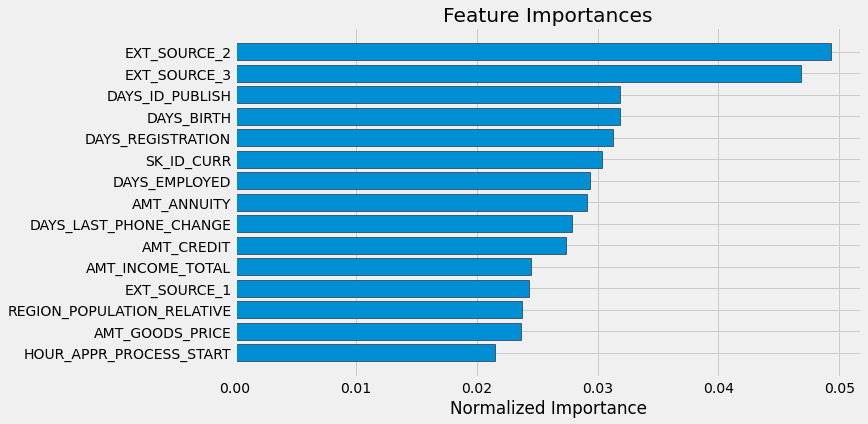

In [62]:
# 기본 기능에 대한 기능 중요도 표시
feature_importances_sorted = plot_feature_importances(feature_importances)

역시 가장 중요한 기능은 EXT_SOURCE와 DAYS_BORTH에 대응하는 기능입니다. 모델에 중요한 기능은 극히 일부이므로 성능 저하 없이 많은 기능을 제거할 수 있습니다(또한 성능이 향상될 수도 있습니다). 기능의 중요도는 모델을 해석하거나 치수 축소를 수행하는 가장 정교한 방법은 아니지만 예측 시 모델이 고려하는 요소를 이해하기 시작합니다.

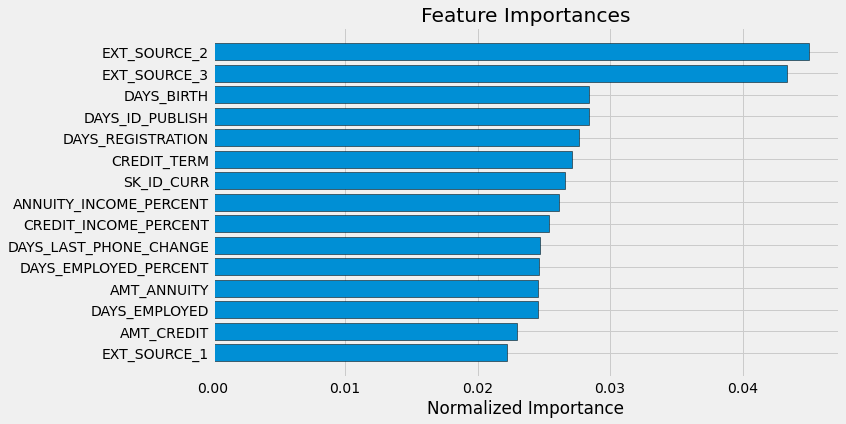

In [63]:
feature_importances_domain_sorted = plot_feature_importances(feature_importances_domain)

네 가지 직접 작업한 변수들이 모두 가장 중요한 상위 15위 안에 든 것을 알 수 있습니다. 이를 통해 우리의 도메인 지식이 적어도 부분적으로 궤도에 올랐다는 확신을 얻을 수 있을 것입니다.

## 결론
이 노트에서는, Kaggle 머신 러닝 콘테스트를 시작하는 방법에 대해 설명했습니다. 우선, 데이터, 작업, 및 제출물의 평가 기준을 확실히 이해했습니다. 그런 다음 모델링에 도움이 될 수 있는 관계, 동향 또는 이상 징후를 식별하기 위해 매우 간단한 EDA를 수행했습니다. 이 과정에서 범주형 변수 인코딩, 결측값 귀속, 기능 범위 조정 등 필요한 전처리 단계를 수행했습니다. 그런 다음 기존 데이터로 새로운 기능을 구축하여 모델에 도움이 되는지 확인했습니다.

데이터 탐색, 데이터 준비 및 기능 엔지니어링이 완료되면 개선하고자 하는 기준 모델을 구현했습니다. 그리고 나서 우리는 첫 번째 점수를 따기 위해 조금 더 복잡한 두 번째 모델을 만들었습니다. 엔지니어링 변수를 추가하는 효과도 알아보기 위한 실험을 실시했습니다.

머신러닝 프로젝트의 개요에 대해 설명했습니다.

1. 문제와 데이터 이해
2. 데이터 클리닝 및 포맷(대부분의 경우)
3. 탐색적 데이터 분석
4. 베이스라인 모델
5. 개량된 모델
6. 모델 해석(약간)



## 추가 : Light Gradient Boosting Machine
이제(필요하다면 이 부분은 완전히 옵션입니다) 심오한 단계에서 벗어나 실제 머신 러닝 모델인 LightGBM 라이브러리를 사용하는 그라데이션 부스트 머신을 사용할 수 있습니다. Gradient Boosting Machine은 현재 구조화된 데이터셋(특히 Kaggle)에 대한 학습을 위한 선두 모델이며, 경쟁에서 잘 나가려면 이 모델의 어떤 형태가 필요할 것입니다. 걱정 마세요. 이 코드가 위협적으로 보일지라도, 이것은 완전한 모델을 만들기 위한 일련의 작은 단계일 뿐입니다. 이 코드를 추가한 것은 이 프로젝트에 대해 어떤 일이 일어날지, 그리고 리더보드에서 조금 더 좋은 점수를 얻을 수 있기 때문입니다. 향후의 노트북에서는, 보다 고도의 모델(대부분의 경우, 기존의 코드를 조정해 보다 효율적으로 동작시키는 것을 의미), 기능 엔지니어링, 기능 선택등의 조작 방법에 대해 설명합니다. 다음 노트에서 만나요!

In [65]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import gc

def model(features,test_features,encoding='ohe',n_folds=5):
    # 인덱스 추출
    train_ids=features['SK_ID_CURR']
    test_ids=test_features['SK_ID_CURR']
    
    # 트레이닝용 라벨을 추출합니다.
    labels=features['TARGET']
    
    # ids와 target 제거
    features=features.drop(columns=['SK_ID_CURR','TARGET'])
    test_features=test_features.drop(columns=['SK_ID_CURR'])
    
    # 원 핫 인코딩
    if encoding=='ohe':
        features=pd.get_dummies(features)
        test_features=pd.get_dummies(test_features)
        
        # 데이터프레임 열별로 정렬
        features,test_features=features.align(test_features,join='inner',axis=1)
        
        # 기록할 범주형 인덱스 x
        cat_indices='auto'
    # 레이블 인코딩 
    elif encoding=='le':
        
        # 레이블 인코딩 만들기
        label_encoder=LabelEncoder()
        
        # 범주형 인덱스 저장 리스트
        cat_indices=[]
        
        # 각 컬럼을 반복합니다.
        for i, col in enumerate(features):
            if features[col].dtype=='object':
                # 범주형 변수를 정수에 매핑
                features[col] = label_encoder.fit_transform(np.array(features[col].astype(str)).reshape((-1,)))
                test_features[col] = label_encoder.transform(np.array(test_features[col].astype(str)).reshape((-1,)))
                
                # 범주형 인덱스를 기록합니다.
                cat_indices.append(i)
                
        # 유효하지 않을 때 에러 표시
        else:
            raise ValueError("Encoding must be either 'ohe' or 'le'")
            
        print('Training Data Shape: ', features.shape)
        print('Testing Data Shape: ', test_features.shape) 
        
    # 변수 이름 추출
    feature_names = list(features.columns)
    
    # 넘파이 어레이 형태로 변환
    features = np.array(features)
    test_features = np.array(test_features)
    
    # kfold 만들기
    k_fold = KFold(n_splits = n_folds, shuffle = True, random_state = 50)
    
    # 변수 중요도 위해 배열 비우기
    feature_importance_values = np.zeros(len(feature_names))
    
    # 테스트 예측을 위한 배열 비우기
    test_predictions = np.zeros(test_features.shape[0])
    
    # 폴드 외 유효성 검사 예측을 위해 어레이를 비웁니다
    out_of_fold = np.zeros(features.shape[0])
    
    # 검증 및 훈련 점수 기록 리스트
    valid_scores = []
    train_scores = []
    
    # 접힌 부분마다 반복
    for train_indices, valid_indices in k_fold.split(features):
        
        # 훈련 데이터를 위한 fold
        train_features, train_labels = features[train_indices], labels[train_indices]
        # 검증 데이터를 위한 fold
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]
        
        # 모델 만들기
        model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)
        
        # 모델 훈련
        model.fit(train_features, train_labels, eval_metric = 'auc',
                  eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names = ['valid', 'train'], categorical_feature = cat_indices,
                  early_stopping_rounds = 100, verbose = 200)
        
        # 최적의 반복 기록
        best_iteration = model.best_iteration_
        
        # 변수의 중요도를 기록합니다.
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        
        # 예측
        test_predictions += model.predict_proba(test_features, num_iteration = best_iteration)[:, 1] / k_fold.n_splits
        
        # fold 예측 기록
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]
        
        # 최고의 점수 기록
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']
        
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        
        # 메모리 정리
        gc.enable()
        del model, train_features, valid_features
        gc.collect()
        
    # 제출용 파일 데이터프레임으로
    submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})
    
    # 변수 중요도 데이터프레임 만들기
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
    
    # 검증 점수 roc로
    valid_auc = roc_auc_score(labels, out_of_fold)
    
    # 메트릭에 전체 점수 추가
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))
    
    # 검증 점수 데이터 프레임 생성에 필요
    fold_names = list(range(n_folds))
    fold_names.append('overall')
    
    # 유효성 검사 점수 데이터 프레임
    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores}) 
    
    return submission, feature_importances, metrics

In [66]:
submission, fi, metrics = model(app_train, app_test)
print('Baseline metrics')
print(metrics)

Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.798723	train's binary_logloss: 0.547797	valid's auc: 0.755039	valid's binary_logloss: 0.563266
[400]	train's auc: 0.82838	train's binary_logloss: 0.518334	valid's auc: 0.755107	valid's binary_logloss: 0.545575
Early stopping, best iteration is:
[315]	train's auc: 0.816657	train's binary_logloss: 0.530116	valid's auc: 0.755215	valid's binary_logloss: 0.552627
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.798409	train's binary_logloss: 0.548179	valid's auc: 0.758332	valid's binary_logloss: 0.563587
[400]	train's auc: 0.828244	train's binary_logloss: 0.518308	valid's auc: 0.758563	valid's binary_logloss: 0.545588
Early stopping, best iteration is:
[317]	train's auc: 0.8169	train's binary_logloss: 0.529878	valid's auc: 0.758754	valid's binary_logloss: 0.552413
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.797648	train's binary_logloss:

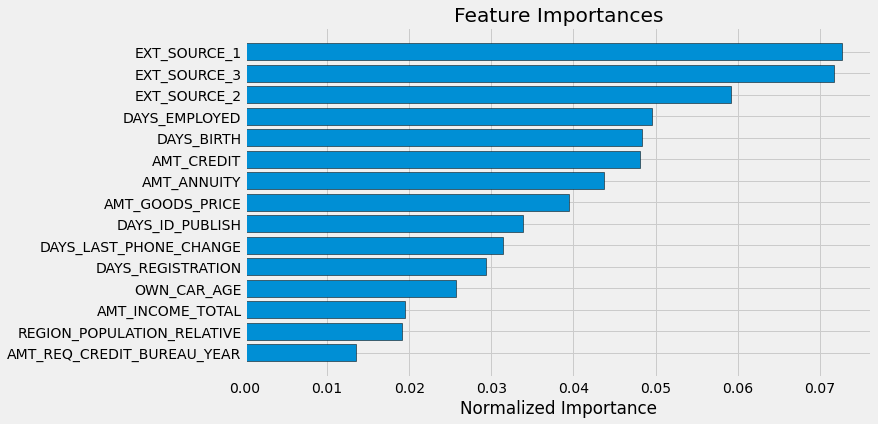

In [67]:
fi_sorted = plot_feature_importances(fi)

In [68]:
app_train_domain['TARGET'] = train_labels

# 도메인 knolwedge 기능을 테스트합니다.
submission_domain, fi_domain, metrics_domain = model(app_train_domain, app_test_domain)
print('Baseline with domain knowledge features metrics')
print(metrics_domain)

Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.804779	train's binary_logloss: 0.541283	valid's auc: 0.762511	valid's binary_logloss: 0.557227
Early stopping, best iteration is:
[268]	train's auc: 0.815523	train's binary_logloss: 0.530413	valid's auc: 0.763069	valid's binary_logloss: 0.550276
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.804016	train's binary_logloss: 0.542318	valid's auc: 0.765768	valid's binary_logloss: 0.557819
Early stopping, best iteration is:
[218]	train's auc: 0.807075	train's binary_logloss: 0.539112	valid's auc: 0.766062	valid's binary_logloss: 0.555952
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.8038	train's binary_logloss: 0.542856	valid's auc: 0.7703	valid's binary_logloss: 0.557925
[400]	train's auc: 0.834559	train's binary_logloss: 0.511454	valid's auc: 0.770511	valid's binary_logloss: 0.538558
Early stopping, best iteration is:
[383]	train's auc

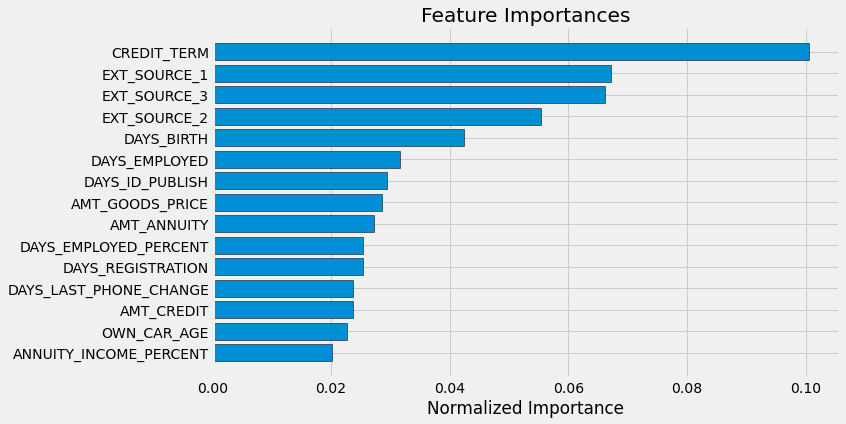

In [69]:
fi_sorted = plot_feature_importances(fi_domain)